# Sentiment Analysis Task
**About Dataset**

  Datasets containing Amazon product reviews are rich repositories of consumer sentiment and feedback on a wide range of products sold on the platform. These datasets typically include information such as product identifiers, review text, star ratings, helpfulness votes, reviewer demographics (when available), and other metadata.

# Load Data from Kaggle

In [1]:
#connect with drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files

# upload kaggle API key for downloading data (json format)
uploaded = files.upload()
for fn in uploaded.keys():
  print(f"File {fn} was uploaded")

# move kaggle.json into folder where API expects to find it
!mkdir -p ~/.kaggle && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
File kaggle.json was uploaded


In [3]:
# Download Dataset
!kaggle datasets download -d mahmudulhaqueshawon/amazon-product-reviews

Dataset URL: https://www.kaggle.com/datasets/mahmudulhaqueshawon/amazon-product-reviews
License(s): MIT
  0% 0.00/1.27M [00:00<?, ?B/s]
100% 1.27M/1.27M [00:00<00:00, 75.1MB/s]


In [5]:
from zipfile import ZipFile
file_name = "/content/amazon-product-reviews.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [7]:
# Define Paths
data_path = "/content/amazon_reviews.csv"

# Import libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# Read data


In [21]:
df=pd.read_csv('/content/amazon.csv')
df.head()

,Text,label
0,This is the best apps acording to a bunch of ...,1
1,This is a pretty good version of the game for ...,1
2,this is a really . there are a bunch of levels...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


# Exploratory Data Analysis

  *   Data previews
  *   Data size   
  *   Data type
  *   Missing _ values
  *   Duplicate Data
  *   Value count  at Label
  *   Visualization


      1 ==> position  
      0 ==> negative

In [92]:
df.tail()

,Text,label
19991,this app is fricken stupid.it froze on the kin...,0
19992,please add me!!!!! i need neighbors! ginger101...,1
19993,love it! this game. is awesome. wish it had mo...,1
19994,i love love love this app on my side of fashio...,1
19995,this game is a rip off. here is a list of thin...,0


In [22]:
# information about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    19996 non-null  object
 1   label   19996 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [24]:
# Missing data
df.isnull().sum()

,0
Text,0
label,0


In [26]:
df.isna().mean()*100

,0
Text,0.0
label,0.0


In [27]:
# check of duplicate data
df.duplicated().sum()

0

In [28]:
# Display value count

df['label'].value_counts()

,count
label,
1,15230
0,4766


# Data Clean




*   Remove noise , inconsistencies, and irrelevant information.
*   convert text into LowerCase





In [30]:
# remove Noise
df['Text']=df['Text'].str.replace('[^\w\s]','')
df.head()

,Text,label
0,This is the best apps acording to a bunch of ...,1
1,This is a pretty good version of the game for ...,1
2,this is a really . there are a bunch of levels...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [37]:
# convert Text to Lowercase
def lower_case(txt):
  txt = txt.lower()
  txt = txt.strip()
  txt = " ".join(txt.split())
  txt =txt.replace('[^\w\s]','')
  return txt
df['Text']=df['Text'].apply(lower_case)
df.head()

,Text,label
0,this is the best apps acording to a bunch of p...,1
1,this is a pretty good version of the game for ...,1
2,this is a really . there are a bunch of levels...,1
3,"this is a silly game and can be frustrating, b...",1
4,this is a terrific game on any pad. hrs of fun...,1


# split data into train and test


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['Text'],df['label'],test_size=0.2,random_state=42)

# Data Preprocessing

* Tokenization
* Remove Stop words
* Stemming or Lemmatization
* Feature Extraction


In [83]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
! pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [84]:
#Tokenization
df_token=df['Text'].apply(word_tokenize)
df_token.head()

,Text
0,"[this, is, the, best, apps, acording, to, a, b..."
1,"[this, is, a, pretty, good, version, of, the, ..."
2,"[this, is, a, really, ., there, are, a, bunch,..."
3,"[this, is, a, silly, game, and, can, be, frust..."
4,"[this, is, a, terrific, game, on, any, pad, .,..."


In [85]:
# remove Stop word
filter_txt =df_token.apply(lambda x: [word for word in x if word not in stopwords.words('english')])
filter_txt.head()

,Text
0,"[best, apps, acording, bunch, people, agree, b..."
1,"[pretty, good, version, game, free, ., lots, d..."
2,"[really, ., bunch, levels, find, golden, eggs,..."
3,"[silly, game, frustrating, ,, lots, fun, defin..."
4,"[terrific, game, pad, ., hrs, fun, ., grandkid..."


In [86]:
# leammtization
Lemma=WordNetLemmatizer()
txt_lemma = filter_txt.apply(lambda x: [Lemma.lemmatize(word) for word in x])
print(f'Original Text : {filter_txt[0]}')
print(f'Lemmatized Text : {txt_lemma[0]}')


Original Text : ['best', 'apps', 'acording', 'bunch', 'people', 'agree', 'bombs', 'eggs', 'pigs', 'tnt', 'king', 'pigs', 'realustic', 'stuff']
Lemmatized Text : ['best', 'apps', 'acording', 'bunch', 'people', 'agree', 'bomb', 'egg', 'pig', 'tnt', 'king', 'pig', 'realustic', 'stuff']


# Feature Extraction ▶

`      we have multiple text representation technology but we are goanna use common techniques `

* TF-IDF , BOW , OneHotEncoder

* Word Embeddings ==> Glove , Bert ,Word2Vec

In [63]:
# text Representaion Using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)
print(X_train_tfidf[1])
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

  (0, 977)	0.09978279863607588
  (0, 15038)	0.09949090911491773
  (0, 6784)	0.1842193402314279
  (0, 8123)	0.18887064310534338
  (0, 11937)	0.22283877058257848
  (0, 6950)	0.24953483652532923
  (0, 14977)	0.2136609136293504
  (0, 11150)	0.28155352389256433
  (0, 1015)	0.3520149772210506
  (0, 1897)	0.34577957017204924
  (0, 6177)	0.2241966102624723
  (0, 16157)	0.20166205486191913
  (0, 4893)	0.22722070951717993
  (0, 4659)	0.2849415657306768
  (0, 10380)	0.14883314375895346
  (0, 9834)	0.13956187459867578
  (0, 8444)	0.20365663561200034
  (0, 16585)	0.22553855199358047
  (0, 12036)	0.26922992061023765
(15996, 16836)
(4000, 16836)


In [64]:
# Text Representation Using Glove
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

embeddings_index={}
f=open('glove.6B.100d.txt',encoding='utf-8')
for line in f:
  values=line.split()
  word=values[0]
  coefs=np.asarray(values[1:],dtype='float32')
  embeddings_index[word]=coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

--2024-10-29 18:51:19--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-10-29 18:51:19--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-10-29 18:51:19--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

# Model Selection and Training

 Using Traditional Machine Learning


      1.   LogisticRegression
      2.   SVM
      3.   Naive Bayes


 Using Deep Learning

      1. Long Short-Term Memory (LSTM) networks
      2. Transformers ==> Bert


In [70]:
# traning Model using LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

LR=LogisticRegression()
LR.fit(X_train_tfidf,y_train)
y_pred=LR.predict(X_test_tfidf)
print( " Accuracy score LR : ",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

 Accuracy score :  0.903
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       978
           1       0.91      0.97      0.94      3022

    accuracy                           0.90      4000
   macro avg       0.90      0.83      0.86      4000
weighted avg       0.90      0.90      0.90      4000



In [73]:
# Using SVM
from sklearn.svm import SVC
SVM=SVC()
SVM.fit(X_train_tfidf,y_train)
y_pred_SVM=SVM.predict(X_test_tfidf)
print( " Accuracy score SVM : ",accuracy_score(y_test,y_pred_SVM))
print(classification_report(y_test,y_pred))

 Accuracy score SVM :  0.9075
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       978
           1       0.91      0.97      0.94      3022

    accuracy                           0.90      4000
   macro avg       0.90      0.83      0.86      4000
weighted avg       0.90      0.90      0.90      4000



In [74]:
# Training Model using Naive Bayes
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train_tfidf, y_train)
y_pred_NB = NB.predict(X_test_tfidf)
print("Accuracy score NB : ", accuracy_score(y_test, y_pred_NB))
print(classification_report(y_test, y_pred_NB))

Accuracy score NB :  0.78625
              precision    recall  f1-score   support

           0       0.96      0.13      0.23       978
           1       0.78      1.00      0.88      3022

    accuracy                           0.79      4000
   macro avg       0.87      0.56      0.55      4000
weighted avg       0.82      0.79      0.72      4000



visualization  Accuracy of Traditional Machine Learning

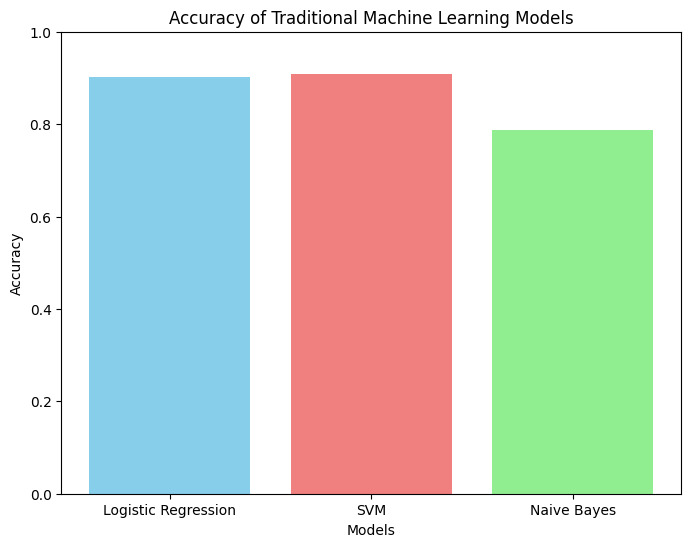

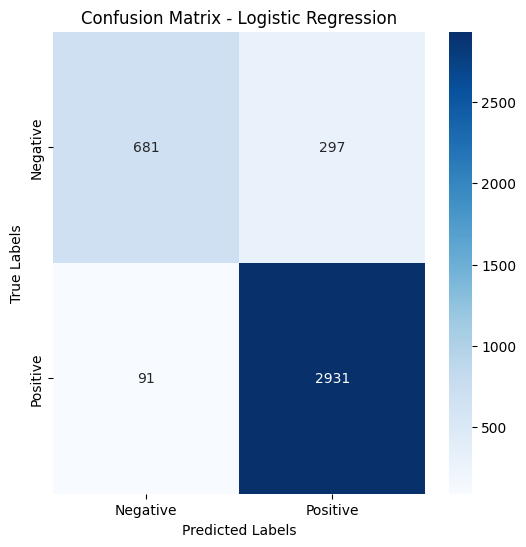

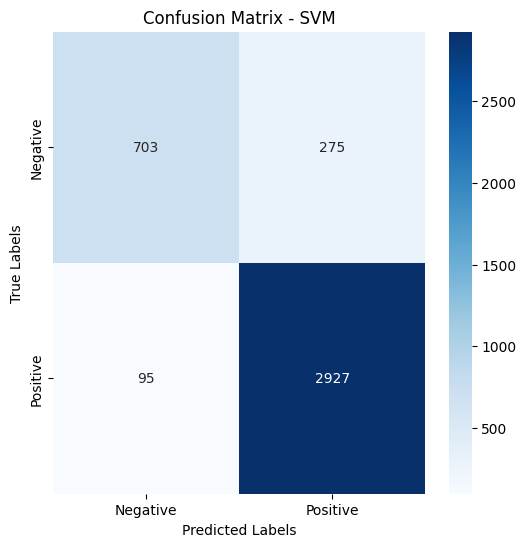

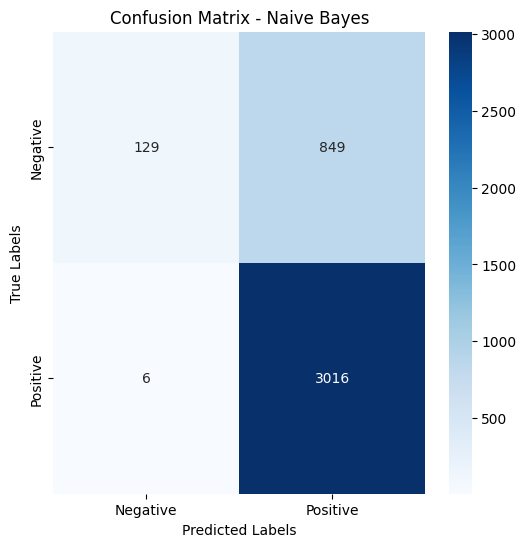

In [75]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'SVM', 'Naive Bayes']
accuracy_scores = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_SVM), accuracy_score(y_test, y_pred_NB)]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Accuracy of Traditional Machine Learning Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.show()
#confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
#similarly create confusion matrix for other models
cm_svm = confusion_matrix(y_test, y_pred_SVM)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
cm_nb = confusion_matrix(y_test, y_pred_NB)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
